# Gravitational waves in general relativity XII Correspondence between toroidal and cylindrical waves by Marder
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

There are several metrics in this paper and for now we only do calculations for metric 18 which is Wey's axially symmetric static metric.  PLEASE NOTE CONVENTION FOR RIEMANN AND WEYL TENSORS NEEDS TO BE CHECKED.  NOT SURE WHICH INDICES ARE UP OR DOWN.  The two constaint equations and one evolution equation are given at the bottom but they have not been solved yet.

https://royalsocietypublishing.org/doi/abs/10.1098/rspa.1972.0034

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
T,r,phi,Z,dT,dr,dphi,dZ,gamma,psi = symbols( 'T r phi Z dT dr dphi dZ gamma psi' ) 

In [4]:
psi = Function('psi')(r,Z)
psi

In [5]:
gamma = Function('gamma')(r,Z)
gamma

In [6]:
variables = Matrix( [T,r,phi,Z] )
variables

⎡T⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣Z⎦

In [7]:
differentials = Matrix( [dT,dr,dphi,dZ] ) 
differentials

⎡ dT ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dZ ⎦

In [8]:
lineElement = expand(exp(2*psi)*dT**2 - r**2 * exp(-2*psi) * dphi**2 - exp(2*(gamma-psi)) * (dr**2 + dZ**2))
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅ψ(r, Z)                                                                   ⎤
⎢ℯ                      0                    0                    0           ⎥
⎢                                                                             ⎥
⎢              2⋅γ(r, Z)  -2⋅ψ(r, Z)                                          ⎥
⎢    0       -ℯ         ⋅ℯ                   0                    0           ⎥
⎢                                                                             ⎥
⎢                                       2  -2⋅ψ(r, Z)                         ⎥
⎢    0                  0             -r ⋅ℯ                       0           ⎥
⎢                                                                             ⎥
⎢                                                        2⋅γ(r, Z)  -2⋅ψ(r, Z)⎥
⎣    0                  0                    0         -ℯ         ⋅ℯ          ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡ 2⋅ψ(r, Z)                                                                   ⎤
⎢ℯ                      0                    0                    0           ⎥
⎢                                                                             ⎥
⎢              2⋅γ(r, Z)  -2⋅ψ(r, Z)                                          ⎥
⎢    0       -ℯ         ⋅ℯ                   0                    0           ⎥
⎢                                                                             ⎥
⎢                                       2  -2⋅ψ(r, Z)                         ⎥
⎢    0                  0             -r ⋅ℯ                       0           ⎥
⎢                                                                             ⎥
⎢                                                        2⋅γ(r, Z)  -2⋅ψ(r, Z)⎥
⎣    0                  0                    0         -ℯ         ⋅ℯ          ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("T r phi Z")
T,r,phi,Z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                            ⎡ -2⋅γ(r, Z) + 4⋅ψ(r, Z) ∂                     
⎢⎡             ∂               ∂          ⎤  ⎢ℯ                      ⋅──(ψ(r, Z))           
⎢⎢     0       ──(ψ(r, Z))  0  ──(ψ(r, Z))⎥  ⎢                        ∂r                    
⎢⎢             ∂r              ∂Z         ⎥  ⎢                                              
⎢⎢                                        ⎥  ⎢                                     ∂        
⎢⎢∂                                       ⎥  ⎢                 0                   ──(γ(r, Z
⎢⎢──(ψ(r, Z))       0       0       0     ⎥  ⎢                                     ∂r       
⎢⎢∂r                                      ⎥  ⎢                                              
⎢⎢                                        ⎥  ⎢                                              
⎢⎢     0            0       0       0     ⎥  ⎢                 0                            
⎢⎢                                        ⎥  ⎢                        

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛    2                2                       ⎞                                            
⎢⎜   ∂                ∂             ∂          ⎟  -2⋅γ(r, Z) + 4⋅ψ(r, Z)                    
⎢⎜r⋅───(ψ(r, Z)) + r⋅───(ψ(r, Z)) + ──(ψ(r, Z))⎟⋅ℯ                                          
⎢⎜    2                2            ∂r         ⎟                                            
⎢⎝  ∂Z               ∂r                        ⎠                                            
⎢───────────────────────────────────────────────────────────────────────                    
⎢                                   r                                                       
⎢                                                                                           
⎢                                                                           ⎛    2          
⎢                                                                           ⎜   ∂           
⎢                                                                     

In [17]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡⎛      2                2                           2           2                          
⎢⎜     ∂                ∂               ⎛∂          ⎞           ∂               ⎛∂          
⎢⎜- r⋅───(γ(r, Z)) - r⋅───(γ(r, Z)) - r⋅⎜──(ψ(r, Z))⎟  + 2.0⋅r⋅───(ψ(r, Z)) - r⋅⎜──(ψ(r, Z))
⎢⎜      2                2              ⎝∂Z         ⎠            2              ⎝∂r         
⎢⎝    ∂Z               ∂r                                      ∂Z                           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                              r            
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

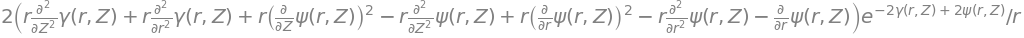

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [20]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

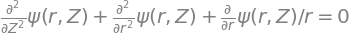

In [27]:
equation20 =  Eq(expand((1/r)*Ric.tensor()[0,0].args[1]),0)
equation20

In [22]:
equation21a = Eq(diff(gamma,r),solve( simplify(einst.tensor())[1,1], diff(gamma,r) )[0] )
equation21a

In [23]:
equation21b = Eq(diff(gamma,Z),solve( simplify(einst.tensor())[3,1], diff(gamma,Z) )[0] )
equation21b

In [28]:
fieldEquations = Matrix([equation20,equation21a,equation21b])
fieldEquations

⎡                                 ∂                 ⎤
⎢     2              2            ──(ψ(r, Z))       ⎥
⎢    ∂              ∂             ∂r                ⎥
⎢   ───(ψ(r, Z)) + ───(ψ(r, Z)) + ─────────── = 0   ⎥
⎢     2              2                 r            ⎥
⎢   ∂Z             ∂r                               ⎥
⎢                                                   ⎥
⎢                ⎛               2                2⎞⎥
⎢∂               ⎜  ⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(r, Z)) = r⋅⎜- ⎜──(ψ(r, Z))⎟  + ⎜──(ψ(r, Z))⎟ ⎟⎥
⎢∂r              ⎝  ⎝∂Z         ⎠    ⎝∂r         ⎠ ⎠⎥
⎢                                                   ⎥
⎢     ∂                 ∂           ∂               ⎥
⎢     ──(γ(r, Z)) = 2⋅r⋅──(ψ(r, Z))⋅──(ψ(r, Z))     ⎥
⎣     ∂Z                ∂Z          ∂r              ⎦

In [26]:
X, Y = map(Function, 'XY')

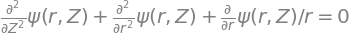

In [30]:
eq = fieldEquations[0]
eq

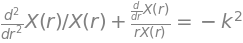

In [32]:
xODE = Eq(pde_separate( eq, psi, [X(r),Y(Z)])[0] , -k**2 ) 
xODE

In [33]:
xSolution = dsolve( xODE , X(r))
xSolution 

In [34]:
#  Here we arbitrarily set one of the Bessel functions equal to zero... fix this later
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],0)
xSolutionParticular

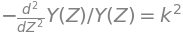

In [36]:
yODE = Eq( pde_separate( eq, psi, [X(r),Y(Z)])[1] ,  k**2 ) 
yODE

In [38]:
ySolution = dsolve( yODE , Y(Z))
ySolution 

In [39]:
#  Here we arbitrarily set cos equal to zero... fix this later
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],1).subs(ySolution.args[1].args[1].args[0],0)
ySolutionParticular

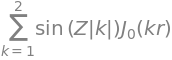

In [40]:
#  Here we arbitrary pick just two terms as an example... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) )

In [41]:
psiSumTwoTerms = Eq(psi, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 
psiSumTwoTerms

In [42]:
dgammadrPDE = fieldEquations[1].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dgammadrPDE

In [43]:
dgammadrPDE.doit()

In [44]:
expand(dgammadrPDE.doit())

In [45]:
integrateGammaWRTr = pdsolve( expand(dgammadrPDE.doit()) )
integrateGammaWRTr 

In [52]:
gammaSolutionR = integrateGammaWRTr.subs(integrateGammaWRTr.args[1].args[6],0)
gammaSolutionR 

In [54]:
dgammadzPDE = fieldEquations[2].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dgammadzPDE

In [55]:
dgammadzPDE.doit()

In [56]:
expand(dgammadzPDE.doit())

In [57]:
integrateGammaWRTz = pdsolve(expand(dgammadzPDE.doit()))
integrateGammaWRTz

In [62]:
gammaSolutionZ = integrateGammaWRTz.subs(integrateGammaWRTz.args[1].args[4],0)
gammaSolutionZ